<a href="https://colab.research.google.com/github/silvererudite/30-for-30-ml-projects/blob/main/vision_understanding/Edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2 as cv
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False


## Reading and preprocessing image to be used with Tensorflow


In [3]:
def load_img(img_path):
  image_bytes = tf.io.read_file(img_path)
  image = tf.image.decode_image(image_bytes)
  image = tf.cast(image, tf.float32)
  image = tf.expand_dims(image, 0)
  return image

## Edge detection
### We are using tensorflow to detect edges with sobel algorithm

In [5]:
image = load_img('/content/images.jpg')
sobel = tf.image.sobel_edges(image)
sobel_y = np.asarray(sobel[0, :, :, :, 0]) # horizontal sobel 
sobel_x = np.asarray(sobel[0, :, :, :, 1]) # vertical sobel

### Images need to be at least 3 x 3 

In [6]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


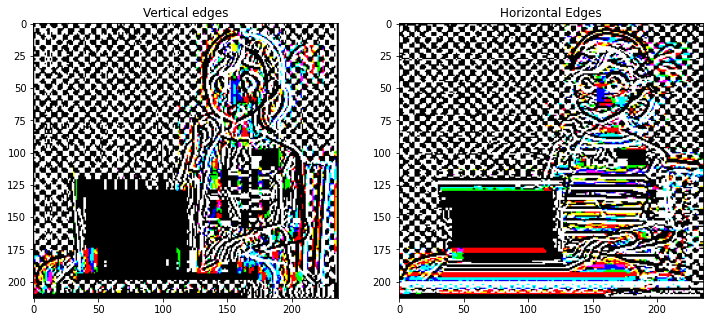

In [7]:
plt.subplot(1, 2, 1)
imshow(sobel_x, 'Vertical edges')

plt.subplot(1, 2, 2)
imshow(sobel_y, 'Horizontal Edges')

## Contour detection

In [12]:
img = cv.imread('/content/images.jpg')
canny = cv.Canny(img, 125, 175)
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)